In [1]:
import concurrent.futures
import pyaudio
import cv2
import scipy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy.io.wavfile import write
from serial.tools import list_ports
import os
import subprocess
import serial

In [2]:
print("Available Audio Devices:")
print("------------------------")
p = pyaudio.PyAudio()
info = p.get_host_api_info_by_index(0)
numdevices = info.get('deviceCount')

for i in range(0, numdevices):
    if (p.get_device_info_by_host_api_device_index(0, i).get('maxInputChannels')) > 0:
        print("Input Device id ", i, " - ", p.get_device_info_by_host_api_device_index(0, i).get('name'))
print("------------------------")




Available Audio Devices:
------------------------
Input Device id  0  -  Yarden Cohen’s iPhone 12 Microphone
Input Device id  1  -  USBDEVICE2.0
Input Device id  2  -  iMac Microphone
Input Device id  4  -  WebexMediaAudioDevice
Input Device id  5  -  ZoomAudioDevice
------------------------


In [3]:
audio_channel_n = input('Choose audio device: ')
devinfo = p.get_device_info_by_index(int(audio_channel_n))  # Or whatever device you care about.
if p.is_format_supported(44100.0,  # Sample rate
                         input_device=devinfo['index'],
                         input_channels=devinfo['maxInputChannels'],
                         input_format=pyaudio.paInt16):
  print('Yay!')
print(devinfo['defaultSampleRate'])


Yay!
48000.0


In [3]:
print("Available Video Device Indexes:")
print("------------------------")
index = 0
arr = []
while True:
    cap = cv2.VideoCapture(index)
    if not cap.read()[0]:
        break
    else:
        arr.append(index)
    cap.release()
    index += 1

print(arr)

Available Video Device Indexes:
------------------------
[0, 1]


In [5]:
cap = cv2.VideoCapture(1)
cap.read()

(True,
 array([[[ 4,  7, 11],
         [ 4,  7, 11],
         [ 4,  7, 11],
         ...,
         [ 0,  1,  1],
         [ 0,  1,  1],
         [ 0,  1,  1]],
 
        [[ 4,  7, 11],
         [ 4,  7, 11],
         [ 4,  7, 11],
         ...,
         [ 0,  1,  1],
         [ 0,  1,  1],
         [ 0,  1,  1]],
 
        [[ 4,  7, 11],
         [ 4,  7, 11],
         [ 4,  7, 11],
         ...,
         [ 0,  1,  1],
         [ 0,  1,  1],
         [ 0,  1,  1]],
 
        ...,
 
        [[ 6, 20, 47],
         [ 6, 20, 47],
         [ 7, 21, 48],
         ...,
         [ 3, 11, 45],
         [ 4, 13, 46],
         [ 6, 15, 48]],
 
        [[ 6, 20, 47],
         [ 6, 20, 47],
         [ 6, 20, 47],
         ...,
         [ 4, 11, 45],
         [ 4, 13, 46],
         [ 6, 15, 48]],
 
        [[ 6, 20, 47],
         [ 6, 20, 47],
         [ 6, 20, 47],
         ...,
         [ 5, 13, 45],
         [ 4, 13, 45],
         [ 5, 14, 47]]], dtype=uint8))

In [85]:
print("------------------------")
print("Available COM port:")
print("------------------------")
port = list(list_ports.comports())
for p in port:
    print(p.device)

------------------------
Available COM port:
------------------------
/dev/cu.BLTH
/dev/cu.URT1
/dev/cu.Bluetooth-Incoming-Port
/dev/cu.usbmodem14401


In [72]:
print(port[0].device)

/dev/cu.BLTH


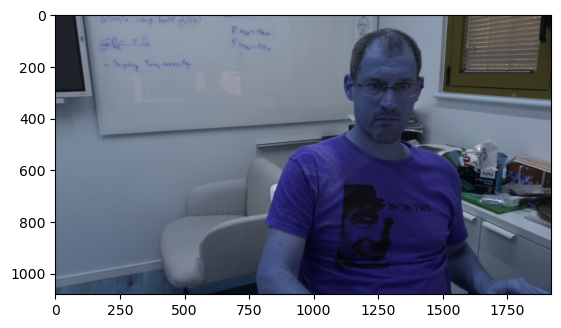

In [4]:
cap = cv2.VideoCapture(1)
frame = cap.read(1)
plt.figure()
plt.imshow(frame[1])
plt.show()


In [5]:
[w,v,c] =np.shape(frame[1])
print([w,v,c])

[1080, 1920, 3]


In [86]:

ser = serial.Serial('/dev/cu.usbmodem14401',baudrate=115200)
ser.close()
ser.open()
ser.write('0n1'.encode('utf-8'))
ser.write('2n0'.encode('utf-8'))
while ser.out_waiting>0:
    pass
ser.write('2n1'.encode('utf-8'))
while ser.out_waiting>0:
    pass


In [107]:
ser.write('0n1'.encode('utf-8'))
while True:
    ser.write('2n1'.encode('utf-8'))
    while ser.out_waiting>0:
        pass
    time.sleep(0.001)
    ser.write('2n0'.encode('utf-8'))
    while ser.out_waiting>0:
        pass
    time.sleep(0.001)

# ser.write(50)
# while ser.out_waiting>0:
#     pass
# ser.write(110)
# while ser.out_waiting>0:
#     pass
# ser.write(49)
# while ser.out_waiting>0:
#     pass
#print(ser.out_waiting)



KeyboardInterrupt: 

In [78]:
np.frombuffer(b'(nz', dtype='b')
ser.write('4nz'.encode('utf-8'))

NameError: name 'ser' is not defined

In [121]:
s = ('4n'+chr(110)).encode()
#ser.write(b'4n'+chr(100).encode('b'))
ser.write(s)
print(s)

b'4nn'


In [99]:
ser.write('2n0'.encode('ASCII'))

3

In [6]:
class Aud_Vid():

    def __init__(self): #, arg
        self.video = cv2.VideoCapture(1)
        self.CHUNK = 1600# 1470 #1470
        self.FORMAT = pyaudio.paInt16
        self.CHANNELS = 1 #2
        self.RATE = 48000 #44100
        self.INDEVIDX = 2
        self.audio = pyaudio.PyAudio() #input_device_index=self.INDEVIDX,
        self.instream = self.audio.open(input_device_index=self.INDEVIDX,format=self.FORMAT,channels=self.CHANNELS,rate=self.RATE,input=True,frames_per_buffer=self.CHUNK)
        self.outstream = self.audio.open(format=self.FORMAT,channels=self.CHANNELS,rate=self.RATE,output=True,frames_per_buffer=self.CHUNK)
        print(self.video.get(cv2.CAP_PROP_FRAME_WIDTH))
        # 640.0
        
        print(self.video.get(cv2.CAP_PROP_FRAME_HEIGHT))
        # 360.0
        
        print(self.video.get(cv2.CAP_PROP_FPS))
        # 29.97002997002997
        
        print(self.video.get(cv2.CAP_PROP_FRAME_COUNT))
        # 360.0

        self.video.set(cv2.CAP_PROP_BUFFERSIZE,0)


    def sync(self):
          with concurrent.futures.ThreadPoolExecutor() as executor:
                  tv = executor.submit(self.video.read) 
                  ta = executor.submit(self.instream.read,1600,exception_on_overflow = False) #1470
                  # exception_on_overflow = False
                  vid = tv.result()
                  aud = ta.result()
                  return(vid[1].tobytes(),aud)

In [7]:
aa = []
bb = []
av = Aud_Vid()
rts = []

1920.0
1080.0
30.00003
0.0


In [9]:
#av.video.get(cv2.CAP_PROP_BUFFERSIZE)
#av.video.get(cv2.CAP_PROP_FPS)
av.instream.get_input_latency()

0.2371875

In [8]:
no_song_band = [500,1500]
song_band = [3000, 8500]

(a,b) = av.sync()
sig_old = np.frombuffer(b, dtype='<i2').reshape(-1).astype('float')/32000.0
(a,b) = av.sync()
sig = np.frombuffer(b, dtype='<i2').reshape(-1).astype('float')/32000.0
f,pxx = cp.signal.welch(np.concatenate([sig_old,sig]), fs=44100, window='hann',nfft=2048)

fidx_no_song = [[i for i,e in enumerate(f) if e >= no_song_band[0]][0], [i for i,e in enumerate(f) if e <= no_song_band[1]][-1]]
fidx_song = [[i for i,e in enumerate(f) if e >= song_band[0]][0], [i for i,e in enumerate(f) if e <= song_band[1]][-1]]

17007

In [195]:
p = pyaudio.PyAudio()
info = p.get_host_api_info_by_index(0)
numdevices = info.get('deviceCount')

for i in range(0, numdevices):
    if (p.get_device_info_by_host_api_device_index(0, i).get('maxInputChannels')) > 0:
        print("Input Device id ", i, " - ", p.get_device_info_by_host_api_device_index(0, i).get('name'))

0.0

In [28]:
# record 10 seconds of video at 30Hz 
aa = []
bb = []
rts = []
no_song_power = []
song_power = []
ents = []
(a,b) = av.sync()
sig_old = np.frombuffer(b, dtype='<i2').reshape(-1).astype('float')/32000.0
for i in range(0,300):
    st = time.time()
    (a,b) = av.sync()
    sig = np.frombuffer(b, dtype='<i2').reshape(-1).astype('float')/32000.0
    f,pxx = cp.signal.welch(np.concatenate([sig_old,sig]), fs=44100, window='hann',nfft=2048)
    sig_old = sig
    no_song_power.append(np.sum(pxx[fidx_no_song[0]:fidx_no_song[1]]))
    song_power.append(np.sum(pxx[fidx_song[0]:fidx_song[1]]))
    psong = pxx[fidx_song[0]:fidx_song[1]] / (np.sum(pxx[fidx_song[0]:fidx_song[1]]) + 1e-10)
    ents.append(-sum(psong*np.log2(psong)))
    #f,t,spect = cp.signal.spectrogram(sig, fs=44100.0)
    #et = time.time()

# get the execution time
    #elapsed_time = et - st
    rts.append(st)
    aa.append(a)
    bb.append(b)
st = time.time()
rts.append(st)

30.027572136326615


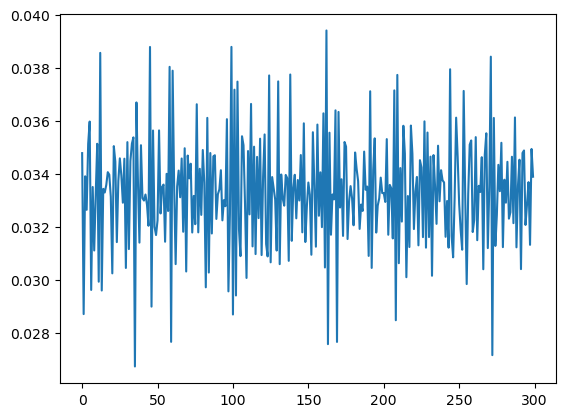

In [29]:
plt.figure()
plt.plot(np.diff(np.array(rts).reshape(-1)))
print(1/np.mean(np.diff(np.array(rts).reshape(-1)[1:])))

In [132]:
[len(x) for x in bb]
sig = np.frombuffer(bb[2], dtype='<i2').reshape(-1).astype('float')
f,t,spect = cp.signal.spectrogram(sig, fs=44100.0)
f,pxx = cp.signal.welch(sig, fs=44100, window='hann',nfft=1024)

In [35]:
int(int(5))

5

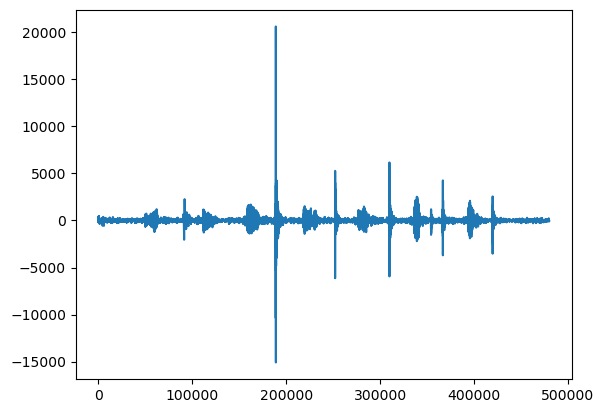

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [32]:
# create audio-video file
bbx = [np.frombuffer(bx, dtype='<i2').reshape(-1) for bx in bb]
data = np.array(bbx).reshape(-1)
plt.figure()
plt.plot(data)
plt.show()
write("example.wav", 48000, data.astype(np.int16))

fourcc = cv2.VideoWriter_fourcc(*'XVID') #XVID
#fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
fps = 30
frame_width = 1920
frame_height = 1080
output = cv2.VideoWriter('output.mp4', fourcc, fps, (frame_width, frame_height))
idx = 0
for ai in aa:
    sig = np.frombuffer(ai, dtype='B').reshape(1080,1920,3)
    output.write(sig)
    print(idx)
    idx += 1

output.release()
print('done')



3.0

In [24]:
# now combine audio and video
import subprocess
subprocess.run("ffmpeg -i output.mp4 -i example.wav -c:v copy -c:a aac av_output.mp4")

FileNotFoundError: [Errno 2] No such file or directory: 'ffmpeg -i output.mp4 -i example.wav -c:v copy -c:a aac av_output.mp4'

In [33]:
os.system("ffmpeg -i output.mp4 -i example.wav -c:v copy -c:a aac av_output.mp4")

ffmpeg version 6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.1.0.2.5)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/6.1.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopenvin

0

In [76]:
import json

curr_dict = {'THR_SONG_NOSONG':1.4,'THR_SONG_BG':21,'THR_ENTROPY':7.5,'SONG_BAND':[3000,8700],'NOSONG_BAND':[500,1500],'EXP_SONG':0.0002,'EXP_BG':600,'SEC_AFTER_TRIGGER':5.0}
filename = 'params.json'
json_object = json.dumps(curr_dict, indent=4)
# Writing to sample.json
with open(filename, "w") as outfile:
    outfile.write(json_object)


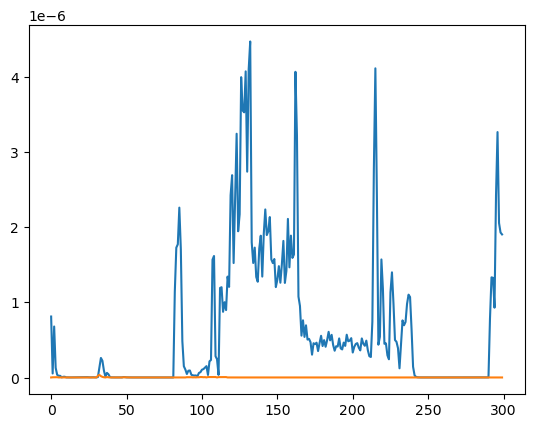

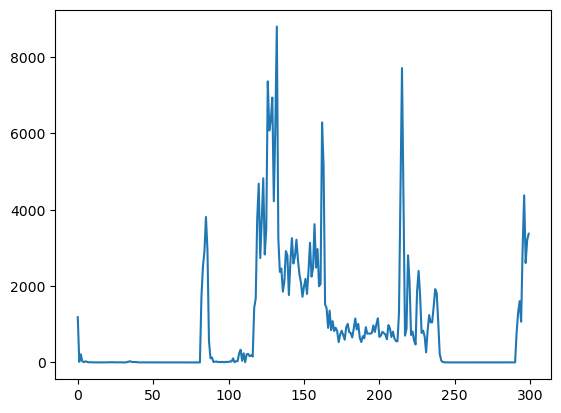

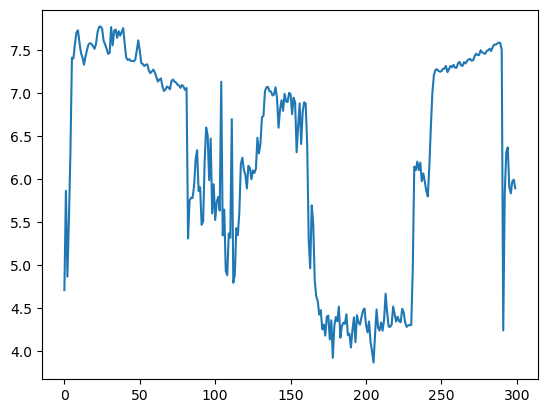

In [176]:
plt.figure()
plt.plot(song_power)
plt.plot(no_song_power)
plt.show()
plt.figure()
plt.plot(np.array(song_power)/(np.array(no_song_power)+1e-15))
plt.show()
plt.figure()
plt.plot(ents)


26.69156737424669


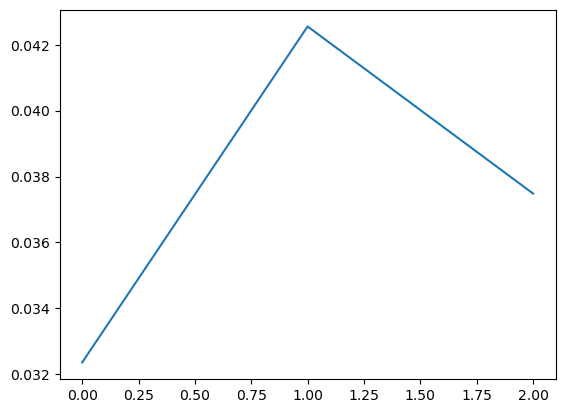

In [146]:
plt.figure()
plt.plot(np.diff(np.array(rts).reshape(-1)))
print(1/np.mean(np.diff(np.array(rts).reshape(-1))))

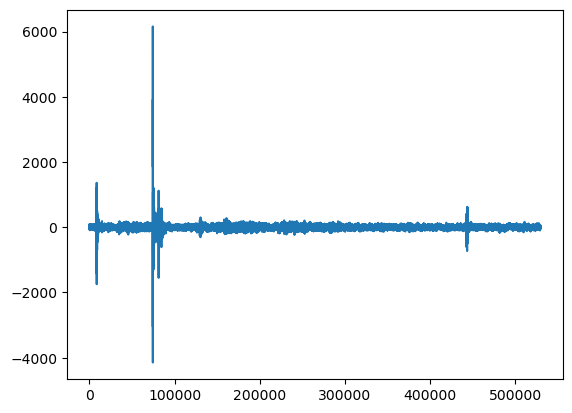

In [75]:
# write audio data
bbx = [np.frombuffer(bx, dtype='<i2').reshape(-1, 1) for bx in bb]
data = np.array(bbx).reshape(-1,1)
plt.figure()
plt.plot(data)
plt.show()
#write("example.wav", 44100, data.astype(np.int16))

In [22]:
#output = cv2.VideoWriter( 
#        "output.avi", cv2.VideoWriter_fourcc(*'MPEG'), 30, (1080, 1920))
# write video data
fourcc = cv2.VideoWriter_fourcc(*'XVID') #XVID
fps = 30
frame_width = 1920
frame_height = 1080
output = cv2.VideoWriter('output.mp4', fourcc, fps, (frame_width, frame_height))
for ai in aa:
    sig = np.frombuffer(ai, dtype='B').reshape(1080,1920,3)
    output.write(sig)

output.release()

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [163]:
len(np.concatenate([sig_old,sig]))

3528

In [159]:
np.shape(np.concatenate([sig, sig]))

(3528,)

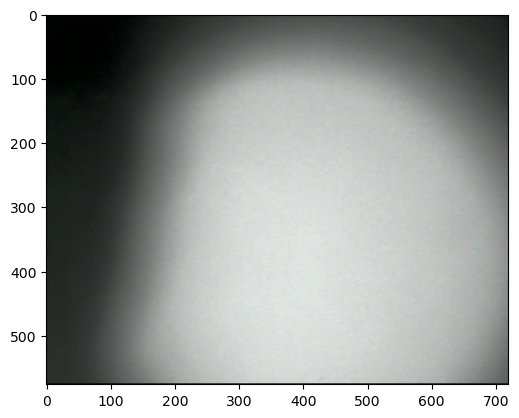

In [11]:
#data_ints = np.array(struct.unpack('<' + 'B'*len(a), aa[9])).reshape(1080,1920,3)
sig = np.frombuffer(aa[20], dtype='B').reshape(576,720,3)
plt.figure()
plt.imshow(sig)
plt.show()

In [51]:
from tkinter import *
master = Tk()
w = Scale(master, from_=0, to=255)
w.pack()

mainloop()